<a href="https://colab.research.google.com/github/moch1996/MachineLearningProj/blob/master/assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('data-pca.txt', delimiter=',')
data[0,0] = 3.38156
x = data[:,0]
y = data[:,1]
data

array([[3.38156, 3.38911],
       [4.52788, 5.85418],
       [2.65568, 4.41199],
       [2.76523, 3.71541],
       [2.84656, 4.17551],
       [3.89067, 6.48838],
       [3.47581, 3.63285],
       [5.9113 , 6.68077],
       [3.92889, 5.09845],
       [4.56184, 5.6233 ],
       [4.57407, 5.39765],
       [4.37173, 5.46117],
       [4.19169, 4.95469],
       [5.24409, 4.66149],
       [2.83584, 3.76802],
       [5.63527, 6.31211],
       [4.68633, 5.66524],
       [2.85051, 4.62646],
       [5.11016, 7.3632 ],
       [5.18256, 4.64651],
       [5.70733, 6.68104],
       [3.57968, 4.80278],
       [5.63938, 6.12044],
       [4.26347, 4.68943],
       [2.53652, 3.88449],
       [3.22383, 4.94256],
       [4.92949, 5.95502],
       [5.79296, 5.10839],
       [2.81685, 4.81896],
       [3.88882, 5.10037],
       [3.34323, 5.89301],
       [5.87973, 5.52142],
       [3.10392, 3.8571 ],
       [5.33151, 4.68074],
       [3.37543, 4.56538],
       [4.77668, 6.25435],
       [2.67575, 3.73097],
 

In [3]:
print(np.var(x))
print(np.sqrt(np.var(x))**2)

1.34852614662096
1.3485261466209602


In [4]:
#Normalized data
def normalize(x,y) :
  mux = np.mean(x)
  muy = np.mean(y)
  sdx = np.sqrt(np.var(x))
  sdy = np.sqrt(np.var(y))

  xn = (x - mux ) / sdx
  yn = (y - muy ) / sdy

  return xn,yn

In [5]:
xn = normalize(x,y)[0]
yn = normalize(x,y)[1]
print(np.mean(xn)) #xn의 평균 = 0
print(np.mean(yn)) #yn의 평균 = 0
print(np.sqrt(np.var(xn))) #xn의 표준편차 = 1
print(np.sqrt(np.var(yn))) #yn의 표준편차 = 1

-1.509903313490213e-16
-4.840572387365683e-16
0.9999999999999999
0.9999999999999999


In [6]:
z = np.ones((50,2))
z[:,0] = xn
z[:,1] = yn
len(z)

50

In [7]:
def covariance(x,y) :
  n = len(x)
  covar = np.dot(x.T,y) / n

  return covar
sigma = covariance(z,z)
sigma

array([[1.     , 0.73553],
       [0.73553, 1.     ]])

In [8]:
sigma

array([[1.     , 0.73553],
       [0.73553, 1.     ]])

In [9]:
eig_val, eig_vec = np.linalg.eig(sigma)

In [10]:
eig_val_matrix = np.diag(eig_val)
print(eig_val_matrix)
test = np.dot(eig_vec,eig_val_matrix)
print(test)
final = np.dot(test,eig_vec.T)
print(final)

[[1.73553 0.     ]
 [0.      0.26447]]
[[ 1.22720503 -0.18700853]
 [ 1.22720503  0.18700853]]
[[1.      0.73553]
 [0.73553 1.     ]]


In [14]:
def pc_direc(covariance) :
  direction_matrix = np.linalg.eig(covariance)[1]
  return direction_matrix
principal_directions = pc_direc(sigma)
principal_directions

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
k1_direc = principal_directions[:,0]
k2_direc = principal_directions[:,1]
print(k1_direc)
print("")
print(k2_direc)

[0.70710678 0.70710678]

[-0.70710678  0.70710678]


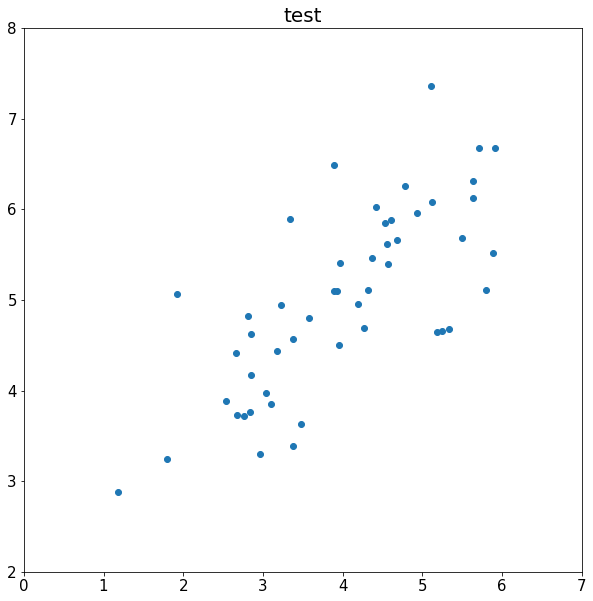

In [27]:
fig1 = plt.figure(1,figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(data[:,0],data[:,1])
plt.title('test',fontsize = 20)
plt.xlim(0,7)
plt.ylim(2,8)

plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)


#OUTPUT

1. Plot the original data points [1pt]

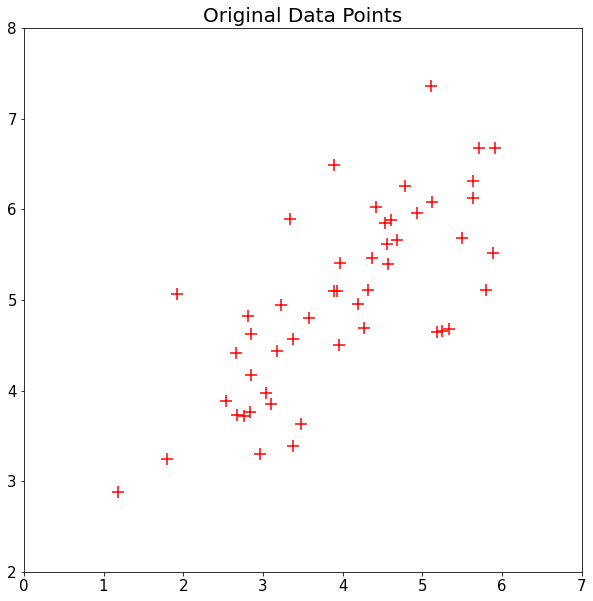

In [ ]:
plt.figure(1,figsize=(10,10))
plt.scatter(data[:,0], data[:,1], s=150, c='red', marker = '+')
plt.title('Original Data Points',fontsize = 20)
plt.xlim(0,7)
plt.ylim(2,8)

plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

plt.show()

2. Plot the normalized data points [1pt]

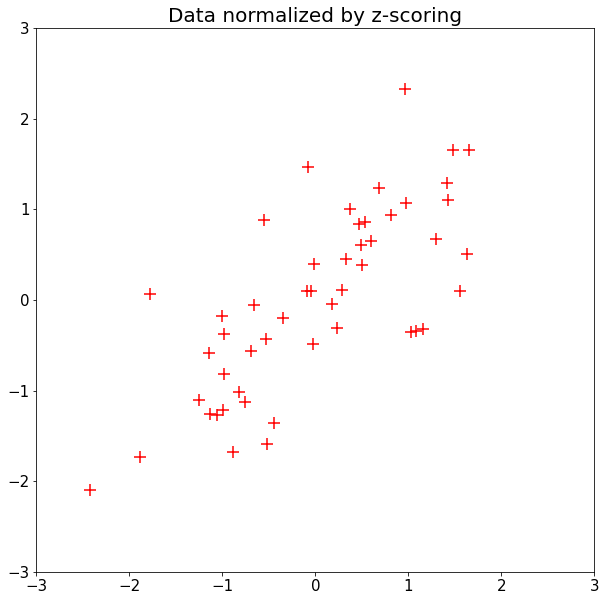

In [ ]:
plt.figure(1,figsize=(10,10))
plt.scatter(xn, yn , s=150, c='red', marker = '+')
plt.title('Data normalized by z-scoring',fontsize = 20)
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

plt.show()